In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             accuracy_score, roc_auc_score, RocCurveDisplay)

from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read and preview the dataframe
df = pd.read_csv("stroke_data.csv", header = 0)
display(df.head(10))

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd0531995b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd053199bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd053199670>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd0531ac190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd0531ac460>],
 'means': []}

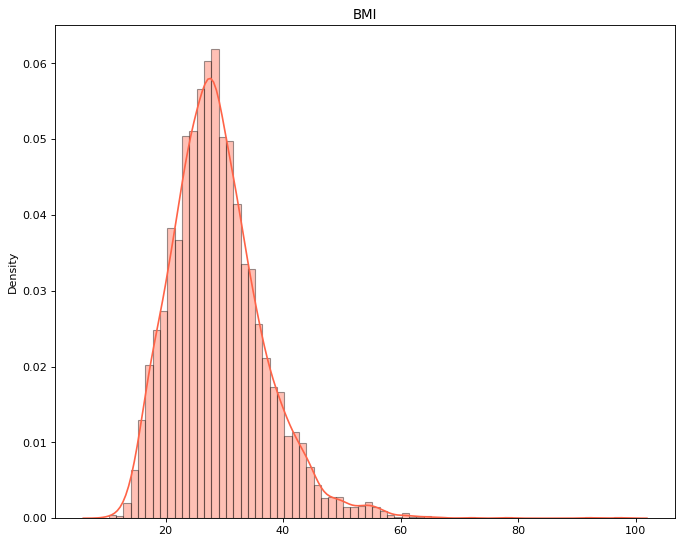

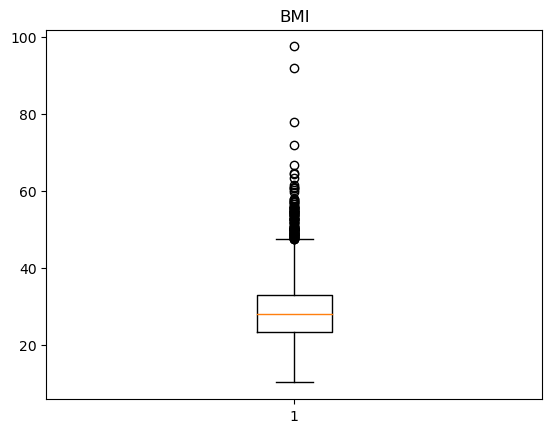

In [3]:
# Detecting NA values and Investigate the Distribution of Problematic column
print (df.isna().any())

# Density plot
plt1 = plt.figure(figsize=(10, 8), dpi=80)
plt.title(r'BMI') 
plt.ylabel(r'Density')
sns.distplot(a=df[["bmi"]], bins=70, color='tomato', hist_kws={"edgecolor": 'black'}, label = 'BMI')

# Box plot
fig1, ax1 = plt.subplots()
ax1.set_title('BMI')
ax1.boxplot(np.array(df[["bmi"]].dropna()))

In [4]:
# Data imputation for columns with missing value
df2 = pd.read_csv("stroke_data.csv", header = 0)
imp = SimpleImputer(missing_values=np.nan, strategy='median', fill_value=None)
df2[["bmi"]]= imp.fit_transform(df2[["bmi"]])

display(df2.head(10))
print (df2.isna().any())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool


In [5]:
# Perfoming One-hot indexing for categorical variables
df2 = df2.join(pd.get_dummies(df2[['work_type', 'Residence_type', 'ever_married', 'smoking_status', 'gender']], drop_first=False))

In [6]:
df2['stroke'].values.tolist().count(1), df2['stroke'].values.tolist().count(0) 

(249, 4861)

In [7]:
num_ones = df2['stroke'].values.tolist().count(1)
num_zeros = df2['stroke'].values.tolist().count(0)
total = num_ones + num_zeros

# report proportion
print(f"The proportion of people having stroke (1) is {num_ones/total:.3f}")
print(f"The proportion of people not having stroke (0) is {num_zeros/total:.3f}")

The proportion of people having stroke (1) is 0.049
The proportion of people not having stroke (0) is 0.951


In [8]:
# report proportions
# oversampling + report proportions
# train-test split
# logistic regression with L1 norm: feature selection
# girdscearch on logistics regression with L1 norm + report confusion matrix
# gridsearch on ID3 tree + report confusion matrix

In [9]:
print (df2.columns)
print (len(df2.columns))

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'ever_married_No', 'ever_married_Yes',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'gender_Female',
       'gender_Male', 'gender_Other'],
      dtype='object')
28


In [10]:
# exclude id, gender, ever_married, work_type, Residence_type, smoking_status
X = df2.loc[:, ~df2.columns.isin(['id', 'gender', 'smoking_status_Unknown', 'gender_Other', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'])]
y = df2['stroke']

In [11]:
# X, y is for oversampling and further train-test split
# X_test_1 and y_test_1 is an completely untouched sample for testing
X, X_test_1, y, y_test_1 = train_test_split(X, y, test_size=.7,
                                                  random_state=0, stratify=y)

In [12]:
rs = RandomOverSampler(random_state=0)
X_rs, y_rs = rs.fit_resample(X, y)
total = y_rs.count()
unique, counts = np.unique(y_rs, return_counts=True)

print(f"After oversampling, the proportion of people having stroke (1) is {counts[1]/total}")
print(f"After oversampling, the proportion of people not having stroke (0) is {counts[0]/total}")


After oversampling, the proportion of people having stroke (1) is 0.5
After oversampling, the proportion of people not having stroke (0) is 0.5


In [13]:
# split 50% training data, 50% "_tmp" for validation & test
X_train, X_tmp, y_train, y_tmp = train_test_split(X_rs, y_rs, test_size=.5,
                                                  random_state=0, stratify=y_rs)

# of remaining 50%, split in half to get 25% validation, 25% test
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=.5,
  random_state=0, stratify=y_tmp)

# logistic regression with L1 norm for feature selection
logis = linear_model.LogisticRegression(max_iter=5000, C = 0.1, penalty = 'l1', solver = 'liblinear')
logis.fit(X_train, y_train)
print(logis.coef_, logis.intercept_)

[[ 0.06969118  0.          0.          0.00245388 -0.02082946  0.
   0.          0.          0.          0.          0.          0.
  -0.20110391  0.          0.          0.          0.          0.
   0.        ]] [-3.57047629]


In [14]:
ind = sorted(range(len(logis.coef_[0])), key = lambda sub: logis.coef_[0][sub])[-6:]
print(X.columns[ind])

Index(['smoking_status_never smoked', 'smoking_status_smokes', 'gender_Female',
       'gender_Male', 'avg_glucose_level', 'age'],
      dtype='object')


In [15]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'ever_married_No', 'ever_married_Yes',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'gender_Female', 'gender_Male'],
      dtype='object')

In [16]:
selected_features = X.columns[ind]

In [17]:
# girdsearch for logistic regression
parameters = {'C':[0.01, 1, 100]}
logis = linear_model.LogisticRegression(max_iter=5000)
clf = GridSearchCV(logis, parameters)
clf.fit(X_train[selected_features], y_train)
print(f'clf.best_score_={clf.best_score_:.3}, ' +
      f'clf.best_params_={clf.best_params_}')

print (f'Accuracy with Best Parameters on Validation: {clf.score(X_valid[selected_features], y_valid):.3}')

clf.best_score_=0.772, clf.best_params_={'C': 0.01}
Accuracy with Best Parameters on Validation: 0.749


The accuracy is: 0.756
The recall is: 0.799
The precision is: 0.735
The AUC is: 0.756


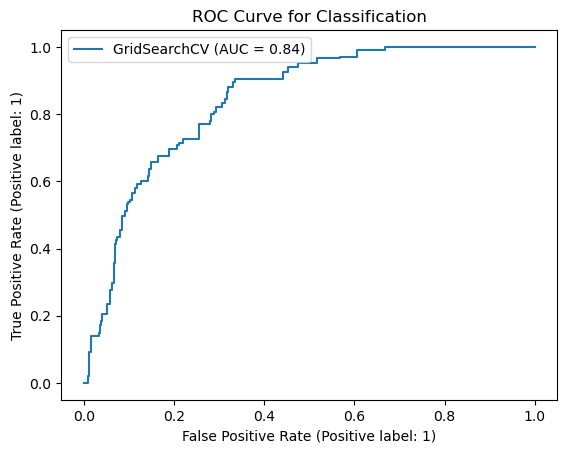

In [18]:
# fit optmized model and report metric
logis = linear_model.LogisticRegression(max_iter=5000, C = 0.01)
logis.fit(X_train[selected_features], y_train)
y_pred = logis.predict(X_test[selected_features])

print (f"The accuracy is: {accuracy_score(y_test, y_pred):.3}")
print (f"The recall is: {recall_score(y_test, y_pred):.3}")
print (f"The precision is: {precision_score(y_test, y_pred):.3}")
print (f"The AUC is: {roc_auc_score(y_test, y_pred):.3}")

RocCurveDisplay.from_estimator(clf, X_test[selected_features], y_test)
plt.title('ROC Curve for Classification')
plt.legend()
plt.show(block=False)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # for tree.plot_tree()
from sklearn.tree import export_text # for export_text()

# gird search for descision tree
parameters = {'max_depth':[1, 3, 5]}
Dtree = DecisionTreeClassifier(criterion='entropy')
clf2 = GridSearchCV(Dtree, parameters)
clf2.fit(X_train, y_train)
print(f'clf.best_score_={clf2.best_score_:.3}, ' +
      f'clf.best_params_={clf2.best_params_}')

print (f'Accuracy with Best Parameters on Validation: {clf2.score(X_valid, y_valid):.3}')

clf.best_score_=0.853, clf.best_params_={'max_depth': 5}
Accuracy with Best Parameters on Validation: 0.848


In [20]:
Dtree = DecisionTreeClassifier(criterion='entropy', max_depth = 5)
Dtree.fit(X_train, y_train)
y_pred = Dtree.predict(X_test)

In [21]:
print (Dtree.feature_importances_)

'''
import dtreeviz.trees
# let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X_train.columns, Dtree.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val
    
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})

values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features')
plt.show()
'''




[0.62271096 0.         0.         0.06088396 0.31640508 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


"\nimport dtreeviz.trees\n# let's create a dictionary of features and their importance values\nfeat_dict= {}\nfor col, val in sorted(zip(X_train.columns, Dtree.feature_importances_),key=lambda x:x[1],reverse=True):\n  feat_dict[col]=val\n    \nfeat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})\n\nvalues = feat_df.Importance    \nidx = feat_df.Feature\nplt.figure(figsize=(10,8))\nclrs = ['green' if (x < max(values)) else 'red' for x in values ]\nsns.barplot(y=idx,x=values,palette=clrs).set(title='Important features')\nplt.show()\n"

In [22]:
feature_names = X.columns
print (export_text(Dtree, feature_names= X.columns.values.tolist()))
plt.show()

|--- age <= 55.50
|   |--- age <= 31.50
|   |   |--- class: 0
|   |--- age >  31.50
|   |   |--- bmi <= 31.20
|   |   |   |--- bmi <= 28.05
|   |   |   |   |--- bmi <= 20.85
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  20.85
|   |   |   |   |   |--- class: 0
|   |   |   |--- bmi >  28.05
|   |   |   |   |--- avg_glucose_level <= 101.96
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- avg_glucose_level >  101.96
|   |   |   |   |   |--- class: 0
|   |   |--- bmi >  31.20
|   |   |   |--- class: 0
|--- age >  55.50
|   |--- age <= 67.50
|   |   |--- bmi <= 26.35
|   |   |   |--- class: 0
|   |   |--- bmi >  26.35
|   |   |   |--- bmi <= 28.55
|   |   |   |   |--- bmi <= 27.65
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- bmi >  27.65
|   |   |   |   |   |--- class: 1
|   |   |   |--- bmi >  28.55
|   |   |   |   |--- bmi <= 34.40
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  34.40
|   |   |   |   |   |--- class: 1
|   |--- age >  67.50
|   

The accuracy is: 0.852
The recall is: 0.964
The precision is: 0.787
The AUC is: 0.852


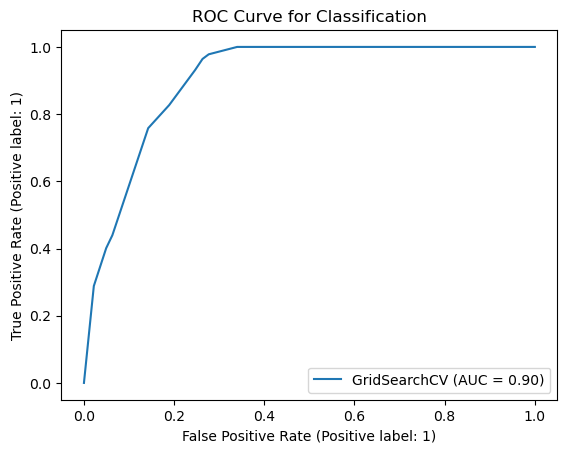

In [23]:
# report metric for descision tree
print (f"The accuracy is: {accuracy_score(y_test, y_pred):.3}")
print (f"The recall is: {recall_score(y_test, y_pred):.3}")
print (f"The precision is: {precision_score(y_test, y_pred):.3}")
print (f"The AUC is: {roc_auc_score(y_test, y_pred):.3}")

RocCurveDisplay.from_estimator(clf2, X_test, y_test)
plt.title('ROC Curve for Classification')
plt.legend()
plt.show(block=False)

In [24]:
#print (logis.predict(X_test[selected_features]))
#print (logis.predict_proba(X_test[selected_features])[:, 1])
#print (Dtree.predict(X_test))
#print (Dtree.predict_proba(X_test)[:, 1])

#avg_prob = (logis.predict_proba(X_test[selected_features])[:, 1] + Dtree.predict_proba(X_test)[:, 1])/2

#print (avg_prob)

The accuracy is: 0.74
The recall is: 0.805
The precision is: 0.135
The AUC is: 0.771


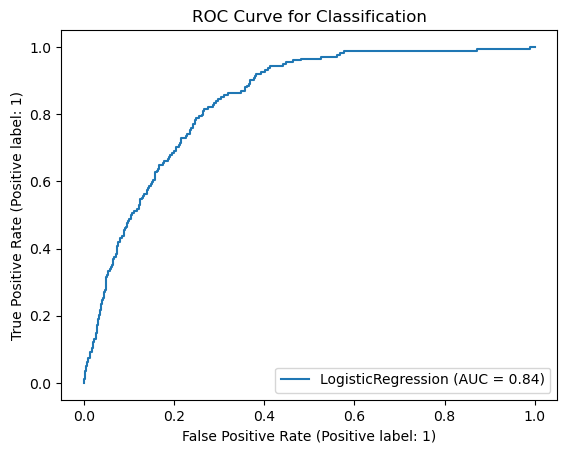

In [25]:
# testing on untouched dataset
y_pred = logis.predict(X_test_1[selected_features])
y_pred_1 = logis.predict(X_test_1[selected_features])

print (f"The accuracy is: {accuracy_score(y_test_1, y_pred):.3}")
print (f"The recall is: {recall_score(y_test_1, y_pred):.3}")
print (f"The precision is: {precision_score(y_test_1, y_pred):.3}")
print (f"The AUC is: {roc_auc_score(y_test_1, y_pred):.3}")

RocCurveDisplay.from_estimator(logis, X_test_1[selected_features], y_test_1)
plt.title('ROC Curve for Classification')
plt.legend()
plt.show(block=False)

The accuracy is: 0.755
The recall is: 0.626
The precision is: 0.119
The AUC is: 0.694


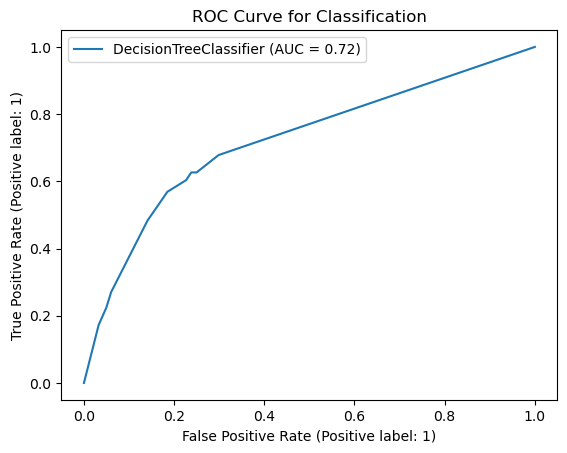

In [26]:
y_pred = Dtree.predict(X_test_1)
y_pred_2 = Dtree.predict(X_test_1)

print (f"The accuracy is: {accuracy_score(y_test_1, y_pred):.3}")
print (f"The recall is: {recall_score(y_test_1, y_pred):.3}")
print (f"The precision is: {precision_score(y_test_1, y_pred):.3}")
print (f"The AUC is: {roc_auc_score(y_test_1, y_pred):.3}")

RocCurveDisplay.from_estimator(Dtree, X_test_1, y_test_1)
plt.title('ROC Curve for Classification')
plt.legend()
plt.show(block=False)

In [27]:
# we predict label 1 only if two models all vote for label 1
avg_predict = []
for i in range(len(y_pred_2)):
    if (y_pred_1[i]==1 and y_pred_2[i]==1):
        avg_predict.append(1)
    else:
        avg_predict.append(0)    

In [28]:
# performance of "majority" vote on test data
print (f"The accuracy is: {accuracy_score(y_test_1, avg_predict):.3}")
print (f"The recall is: {recall_score(y_test_1, avg_predict):.3}")
print (f"The precision is: {precision_score(y_test_1, avg_predict):.3}")
print (f"The AUC is: {roc_auc_score(y_test_1, avg_predict):.3}")

The accuracy is: 0.807
The recall is: 0.575
The precision is: 0.139
The AUC is: 0.697


In [29]:
# plot male vs. female stroke status
# plot distribution of age, bmi, glucose_level of stroke and non-stroke group

In [30]:
dfstroke=df[['gender','stroke']]
dfstroke
#print(len(dfstroke[dfstroke['gender']=='Male'][dfstroke['stroke'] == 0]))
datastroke = {'gender': ['Male', 'Female'], 
              'Stroke': [len(dfstroke[dfstroke['gender']=='Male'][dfstroke['stroke'] == 1]), len(dfstroke[dfstroke['gender']=='Female'][dfstroke['stroke'] == 1])],
              'Non-Stroke': [len(dfstroke[dfstroke['gender']=='Male'][dfstroke['stroke'] == 0]), len(dfstroke[dfstroke['gender']=='Female'][dfstroke['stroke'] == 0])]
                                                                                                    }  
dfstroke2 = pd.DataFrame(datastroke)  
dfstroke2=dfstroke2.set_index('gender')
# Print the output.  
print(dfstroke2) 

        Stroke  Non-Stroke
gender                    
Male       108        2007
Female     141        2853


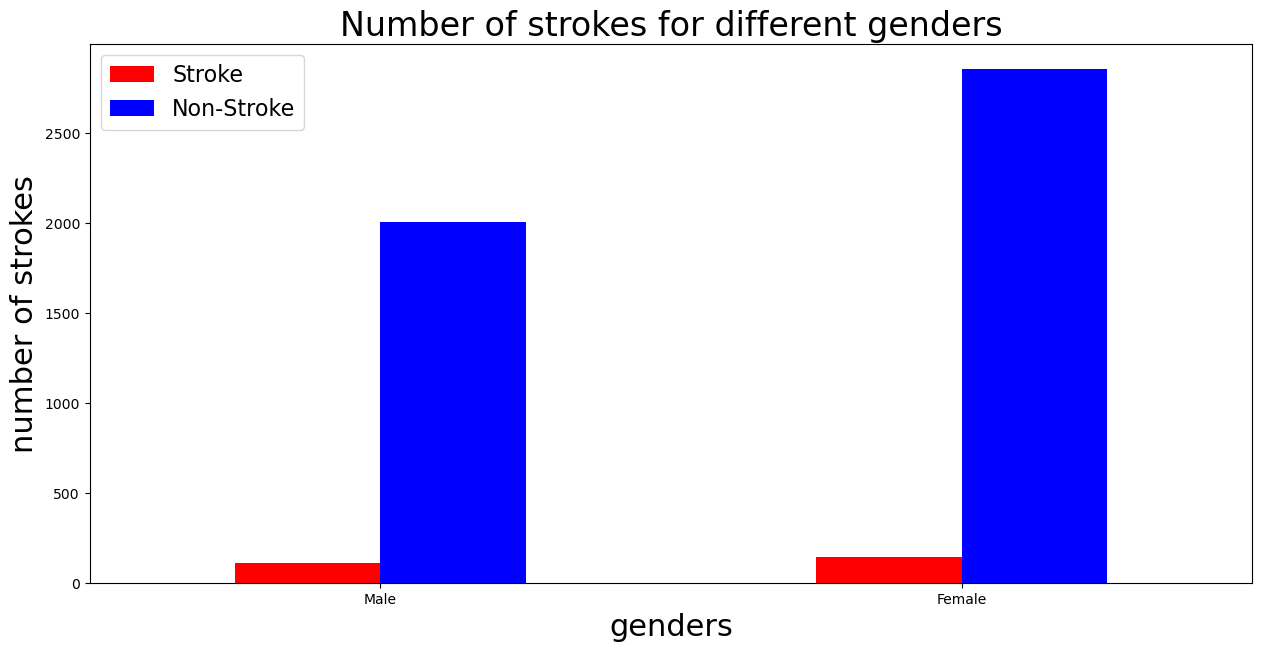

In [31]:
ax = dfstroke2.plot(kind='bar', figsize=(15, 7), rot=0, xlabel='Class', ylabel='Count', color=['red','blue'])
ax.set_ylabel('number of strokes',fontsize=22)
ax.set_xlabel('genders',fontsize=22)
ax.set_title('Number of strokes for different genders',fontsize=24)

plt.legend(fontsize=16)
plt.savefig('p1.jpg')

In [32]:
df_withstroke = df.iloc[:249,:]
df_withstroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


In [33]:
df_withoutstroke = df.iloc[249:, :]
df_withoutstroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


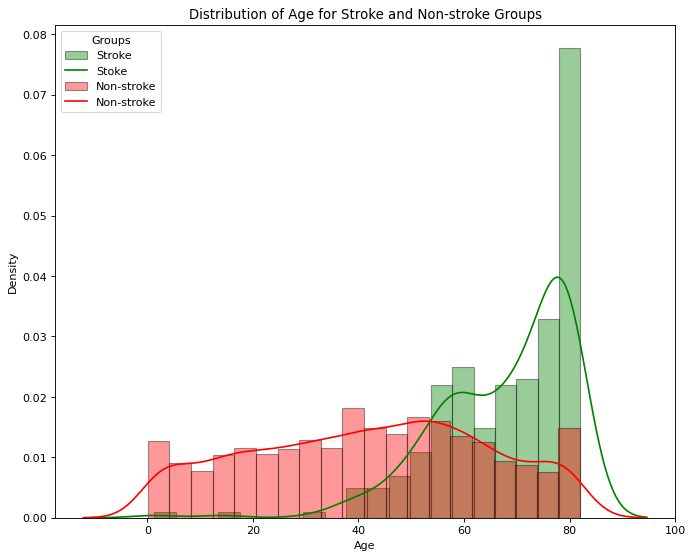

In [34]:
# age
plt1 = plt.figure(figsize=(10, 8), dpi=80)
plt.title(r'Distribution of Age for Stroke and Non-stroke Groups') 
plt.xlabel("Age")
plt.ylabel('Density')
sns.distplot(a=df_withstroke[["age"]], bins=20, color="green", hist_kws={"edgecolor": 'black'}, label = 'Stroke')
sns.distplot(a=df_withoutstroke[["age"]], bins=20, color="red", hist_kws={"edgecolor": 'black'}, label = 'Non-stroke')
plt.legend(title='Groups', loc='upper left', labels=["Stroke", "Stoke", "Non-stroke", "Non-stroke"])
plt.show()

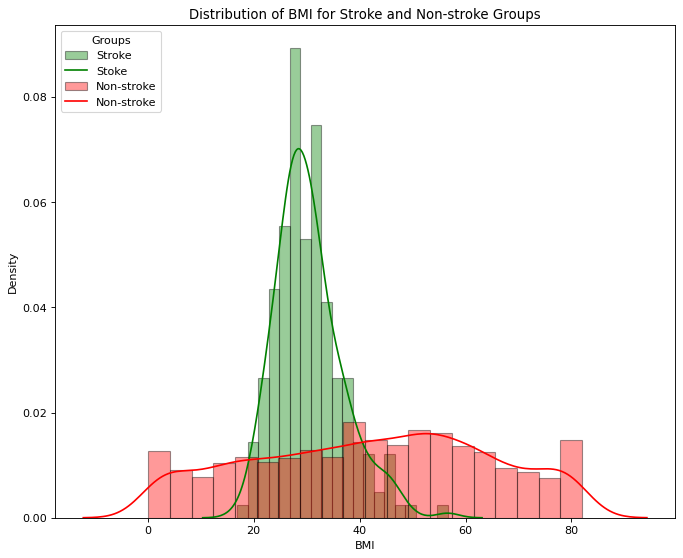

In [35]:
# bmi
plt1 = plt.figure(figsize=(10, 8), dpi=80)
plt.title(r'Distribution of BMI for Stroke and Non-stroke Groups') 
plt.xlabel("BMI")
plt.ylabel('Density')
sns.distplot(a=df_withstroke[["bmi"]], bins=20, color="green", hist_kws={"edgecolor": 'black'}, label = 'Stroke')
sns.distplot(a=df_withoutstroke[["age"]], bins=20, color="red", hist_kws={"edgecolor": 'black'}, label = 'Non-stroke')
plt.legend(title='Groups', loc='upper left', labels=["Stroke", "Stoke", "Non-stroke", "Non-stroke"])
plt.show()

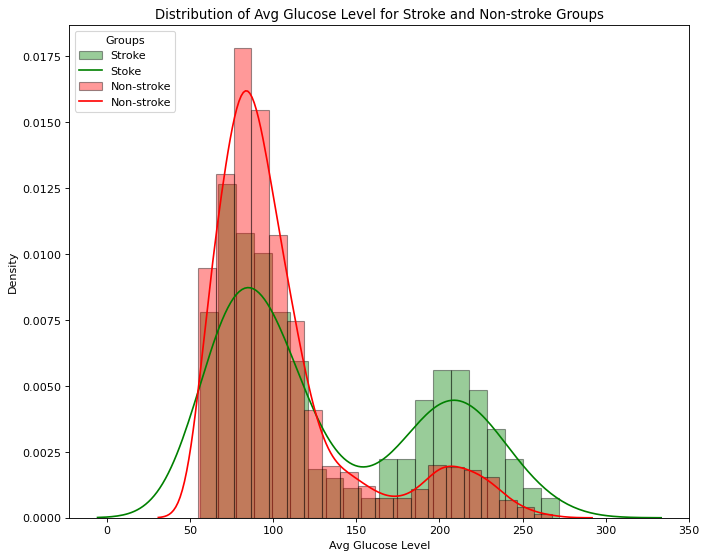

In [36]:
# glucose level
plt1 = plt.figure(figsize=(10, 8), dpi=80)
plt.title(r'Distribution of Avg Glucose Level for Stroke and Non-stroke Groups') 
plt.xlabel("Avg Glucose Level")
plt.ylabel('Density')
sns.distplot(a=df_withstroke[["avg_glucose_level"]], bins=20, color="green", hist_kws={"edgecolor": 'black'}, label = 'Stroke')
sns.distplot(a=df_withoutstroke[["avg_glucose_level"]], bins=20, color="red", hist_kws={"edgecolor": 'black'}, label = 'Non-stroke')
plt.legend(title='Groups', loc='upper left', labels=["Stroke", "Stoke", "Non-stroke", "Non-stroke"])
plt.show()